In [166]:
import pandas as pd
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa
from scipy.signal import butter, filtfilt
import tensorflow as tf

In [171]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory="data/train",
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')


Found 64727 files belonging to 31 classes.
Using 51782 files for training.
Using 12945 files for validation.


In [178]:
t = list(train_ds)

In [107]:
# for lstm with spectrogram?

hop_length=512
n_fft = 255
n_mfcc=128
y = np.array([])
X = np.array([[]])
main_classes = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
train_set_path = "data\\train"
for class_dir in os.listdir(train_set_path):
    class_train_path = os.path.join(train_set_path, class_dir)
    pred_class = None
    if class_dir in main_classes:
        pred_class = class_dir
    else:
        pred_class = "unknown"
    for wav_file in tqdm(os.listdir(class_train_path), f"Processing {class_dir}"):
        data, samplerate = librosa.load(os.path.join(class_train_path, wav_file), sr=16000, mono=True)
        zero_vect = np.zeros(16000 - data.shape[0])
        data = np.concatenate((data, zero_vect))

        S = librosa.feature.melspectrogram(y=data, sr=samplerate, n_mels=128,fmax=8000)
        data = librosa.feature.mfcc(y=data, sr=samplerate, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc, S=librosa.feature.mfcc(S=librosa.power_to_db(S)))
        data = np.array((data-np.min(data))/(np.max(data)-np.min(data)))

        if X.shape[1] == 0:
            X = np.expand_dims(data, axis=0)
        else:
            X = np.concatenate((X, np.expand_dims(data, axis=0)), axis=0)
        y = np.concatenate((y, np.array([pred_class])))
    break

Processing bed: 100%|██████████| 1713/1713 [00:13<00:00, 125.79it/s]


In [181]:
# for transformers

y = np.array([])
X = np.array([[]])
main_classes = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
train_set_path = "data\\train"
for class_dir in os.listdir(train_set_path):
    class_train_path = os.path.join(train_set_path, class_dir)
    pred_class = None
    if class_dir in main_classes:
        pred_class = class_dir
    else:
        pred_class = "unknown"
    for wav_file in tqdm(os.listdir(class_train_path), f"Processing {class_dir}"):
        data, samplerate = librosa.load(os.path.join(class_train_path, wav_file), sr=16000, mono=True)
        zero_vect = np.zeros(16000 - data.shape[0])
        data = np.concatenate((data, zero_vect))

        if X.shape[1] == 0:
            X = np.expand_dims(data, axis=0)
        else:
            X = np.concatenate((X, np.expand_dims(data, axis=0)), axis=0)
        y = np.concatenate((y, np.array([pred_class])))
    break

Processing bed: 100%|██████████| 1713/1713 [01:25<00:00, 20.14it/s]


In [163]:
X.shape

(1713, 16000)

In [55]:
def butter_lowpass_filter(data, cutoff_freq, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    print(f"Filtered audio shape: {filtered_data.shape}")
    return filtered_data
 
filtered_audio = butter_lowpass_filter(data, cutoff_freq=4000, sample_rate=16000)

Filtered audio shape: (14861,)


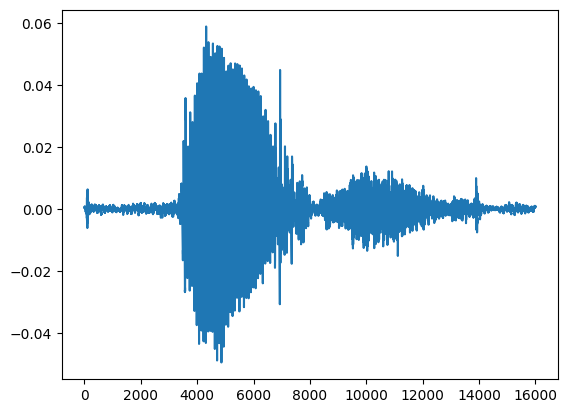

In [129]:
# win = np.hanning(samplerate)
filtered_audio = data

plt.plot(np.linspace(1, filtered_audio.shape[0], filtered_audio.shape[0]), filtered_audio)

In [123]:
data, samplerate = librosa.load('data/train/audio/yes/00f0204f_nohash_0.wav', sr=16000, mono=True)

(128, 32)


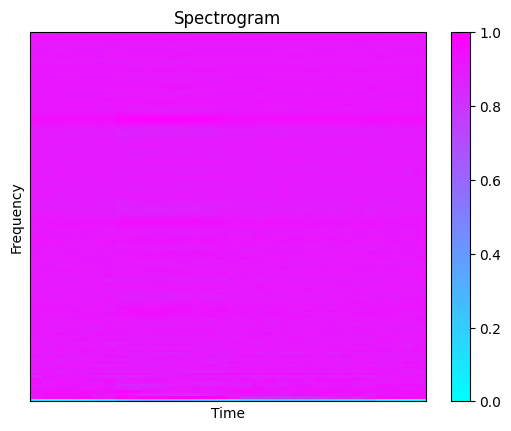

In [160]:
hop_length=512
n_fft = 255
n_mfcc=128
# S = librosa.feature.melspectrogram(y=data, sr=samplerate, n_mels=256,fmax=8000)
# X = librosa.feature.mfcc(y=data, sr=samplerate, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc, S=librosa.feature.mfcc(S=librosa.power_to_db(S)))
X = librosa.feature.mfcc(y=data, sr=samplerate, n_mfcc=n_mfcc, n_fft=n_fft)
X = np.array((X-np.min(X))/(np.max(X)-np.min(X)))
print(X.shape)
librosa.display.specshow(X,sr=samplerate, cmap='cool',hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel('Frequency')
plt.title("Spectrogram")
plt.colorbar()
plt.show()

In [161]:
X

array([[0.03267467, 0.01694185, 0.01628212, ..., 0.01997297, 0.        ,
        0.01837875],
       [0.91387796, 0.9515284 , 0.9389912 , ..., 0.95467275, 0.93807274,
        0.93888366],
       [0.9057396 , 0.93679667, 0.92694956, ..., 0.91314286, 0.92506737,
        0.922472  ],
       ...,
       [0.9127936 , 0.91024905, 0.9090447 , ..., 0.91058743, 0.90775126,
        0.9124071 ],
       [0.90263337, 0.90382135, 0.90368104, ..., 0.9054956 , 0.9004591 ,
        0.903051  ],
       [0.9021052 , 0.90183616, 0.9039965 , ..., 0.8998921 , 0.9061661 ,
        0.90032023]], dtype=float32)